# Introduction

The datasets that I am exploring are from the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a quirky, funny comment about the dog. These ratings have a denominator of 10 but the numerators are almost always greater than 10. The reason is because WeRateDogs loves dogs and rates most above 100%I. WeRateDogs has over 4 million followers and has received international media coverage.

I will be collecting my data from three different sources.

### Sources

1.) twitter_archive_enhanced.csv - a file provided by Udacity

2.) img_predictions.tsv - a file hosted on Udacity's servers

3.) I will use the Tweepy library to query Twitter's API for additional data.  I will read this data into a json file and extract it from this file to create a dataframe.


More information can be found about this process in the file...


In [260]:
#Import twitter archive csv file 
import pandas as pd
import numpy as np

twitter_arc = pd.read_csv('wrangling_data_files/twitter-archive-enhanced.csv')
twitter_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [261]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [262]:
#make a copy of the dirty dataset 
twitter_arc_clean = twitter_arc.copy()
twitter_arc_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Quality Issues:
- Change tweet_id to str object
- Change timestamp to datetime dtype
- Remove "a" tag from source href
- Remove rows with retweeted status id that is not null, these are retweets
- Check that names in text column match names in name column
- Check that rating in text column matches the "rating_numerator" and "rating_denominator" and set as new values
- Check to make sure dog_stage matches text column, if not change to match
- Change names equal to "a" and "None" to Null

 

Tidiness Issues:
- Seperate href, rel, and source into seperate columns
- Merge columns for dog classification (ie doggo, floofer, pupper, puppo) into one column and name it "dog_stage"
- Change rows with multiple dog stages to "multiple"


In [263]:
#check name values
twitter_arc_clean.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
            ... 
Lillie         1
Stephanus      1
Godzilla       1
Mya            1
Evy            1
Name: name, Length: 957, dtype: int64

In [264]:
#see if name "a" is in text
a_name = twitter_arc_clean.query('name == "a"')
a_name

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [265]:
#name "a" not in text so change "a" and "None" names to null
twitter_arc_clean['name'] = twitter_arc_clean['name'].replace(['a', 'None'], np.nan)
#test
twitter_arc_clean.name.value_counts()

Charlie    12
Oliver     11
Cooper     11
Lucy       11
Lola       10
           ..
Scott       1
Rodman      1
Jaycob      1
Brat        1
Evy         1
Name: name, Length: 955, dtype: int64

In [266]:
#Change datatype to int64 to remove scientific notation
twitter_arc_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id' ]]= twitter_arc_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id']].fillna(0)
twitter_arc_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id' ]] = twitter_arc_clean[['tweet_id','in_reply_to_status_id', 'in_reply_to_user_id']].astype(np.int64)

#Test
twitter_arc_clean['tweet_id'].unique()

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

In [267]:
#Test to see if type has changed
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       2356 non-null   int64  
 2   in_reply_to_user_id         2356 non-null   int64  
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1556 non-null   object 
 13  doggo                       2356 

In [268]:
#change tweet_id, in_reply_to_status_id, in_reply_to_user_id to string object
twitter_arc_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id']] = twitter_arc_clean[['tweet_id', 
'in_reply_to_status_id', 'in_reply_to_user_id']].astype(str).replace('0', np.nan)
#test
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     object 
 2   in_reply_to_user_id         78 non-null     object 
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1556 non-null   object 
 13  doggo                       2356 

In [269]:
twitter_arc_clean['timestamp'].head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [270]:
#remove last four digits from timestamp
twitter_arc_clean['timestamp'] = twitter_arc_clean['timestamp'].str[:-5]
twitter_arc_clean['timestamp'].head()

0    2017-08-01 16:23:56 
1    2017-08-01 00:17:27 
2    2017-07-31 00:18:03 
3    2017-07-30 15:58:51 
4    2017-07-29 16:00:24 
Name: timestamp, dtype: object

In [271]:
#convert timestamp to datetime format
twitter_arc_clean['timestamp'] = pd.to_datetime(twitter_arc_clean['timestamp'], format='%Y-%m-%d %H')
#test
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     object        
 2   in_reply_to_user_id         78 non-null     object        
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

In [272]:
#remove rows that have retweeted_status_id, these are retweets
twitter_arc_clean = twitter_arc_clean[twitter_arc_clean.retweeted_status_id.isnull()]

#test to make sure all retweet rows were removed
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   object        
 1   in_reply_to_status_id       78 non-null     object        
 2   in_reply_to_user_id         78 non-null     object        
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

In [273]:
#drop rows that are retweets
twitter_arc_clean = twitter_arc_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)
#test
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2175 non-null   object        
 1   in_reply_to_status_id  78 non-null     object        
 2   in_reply_to_user_id    78 non-null     object        
 3   timestamp              2175 non-null   datetime64[ns]
 4   source                 2175 non-null   object        
 5   text                   2175 non-null   object        
 6   expanded_urls          2117 non-null   object        
 7   rating_numerator       2175 non-null   int64         
 8   rating_denominator     2175 non-null   int64         
 9   name                   1440 non-null   object        
 10  doggo                  2175 non-null   object        
 11  floofer                2175 non-null   object        
 12  pupper                 2175 non-null   object        
 13  pup

In [274]:
#Remove "a" tag from source href and test
twitter_arc_clean['source_url'] = twitter_arc_clean.source.str.extract('(http:.[^"]+)', expand=True)
#test
twitter_arc_clean['source_url'].head()

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source_url, dtype: object

In [275]:
#unique urls in source_urls
twitter_arc_clean.source_url.nunique()

3

In [276]:
#drop unnecessary columns
twitter_arc_clean = twitter_arc_clean.drop(columns=["source"])

In [277]:
#test to see if column was dropped
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2175 non-null   object        
 1   in_reply_to_status_id  78 non-null     object        
 2   in_reply_to_user_id    78 non-null     object        
 3   timestamp              2175 non-null   datetime64[ns]
 4   text                   2175 non-null   object        
 5   expanded_urls          2117 non-null   object        
 6   rating_numerator       2175 non-null   int64         
 7   rating_denominator     2175 non-null   int64         
 8   name                   1440 non-null   object        
 9   doggo                  2175 non-null   object        
 10  floofer                2175 non-null   object        
 11  pupper                 2175 non-null   object        
 12  puppo                  2175 non-null   object        
 13  sou

In [278]:
#print to see how text in formatted, row 9 because has a dodg_stage mentioned
twitter_arc_clean.text.iloc[9]

'This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A'

In [279]:
#extract rating from text column
twitter_arc_clean['rating'] = twitter_arc_clean.text.str.extract(r'(\d\d?.\d\d?)')
twitter_arc_clean['rating'].head()

0    13/10
1    13/10
2    12/10
3    13/10
4    12/10
Name: rating, dtype: object

In [280]:
#replace rating_numerator and rating_denominator columns values with found values in replace
twitter_arc_clean['rating_numerator'], twitter_arc_clean['rating_denominator'] = twitter_arc_clean.rating.str.split('/', 1).str
twitter_arc_clean = twitter_arc_clean.drop('rating', axis=1)

#test
twitter_arc_clean.head()

<ipython-input-280-99d352c644a9>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  twitter_arc_clean['rating_numerator'], twitter_arc_clean['rating_denominator'] = twitter_arc_clean.rating.str.split('/', 1).str


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,http://twitter.com/download/iphone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,http://twitter.com/download/iphone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,http://twitter.com/download/iphone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,http://twitter.com/download/iphone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,http://twitter.com/download/iphone


In [281]:
#search for type of dog in the text, if found place in new column with type as name of column

#items we are searching the text for
mylist = ['(doggo)','(puppo)','(floofer)','(pupper)']
#name of columns
column_list = ['doggo','puppo','floofer','pupper']
number = 0
count = 0

for item in mylist:
    twitter_arc_clean[column_list[count]] = twitter_arc_clean.text.str.extract(item)
    number +=1
    count +=1
#check through row ten because we know type was "doggo"
twitter_arc_clean.head(10)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN,http://twitter.com/download/iphone


In [285]:
#Add type columns together to form one column
twitter_arc_clean['dog_stage'] = twitter_arc_clean.fillna('')['doggo'] + twitter_arc_clean.fillna('')['floofer'] + twitter_arc_clean.fillna('')['pupper'] + twitter_arc_clean.fillna('')['puppo']
#replace blanks with NaN
twitter_arc_clean.loc[twitter_arc_clean.dog_stage == '', 'dog_stage'] = np.nan
twitter_arc_clean.head(10)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN,http://twitter.com/download/iphone,doggo


In [286]:
#look at unique values in dog_stage column, we can see there are some dogs with multiple stages
twitter_arc_clean.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggopupper'], dtype=object)

In [287]:
#set all rows with multiple stages to "multiple"
twitter_arc_clean.loc[twitter_arc_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'multiple'
twitter_arc_clean.loc[twitter_arc_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'multiple'

#test to see if dogs with multiple stage are classified as "multiple"
twitter_arc_clean[twitter_arc_clean.dog_stage == 'multiple']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,dog_stage
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,NaN,doggo,NaN,NaN,puppo,http://twitter.com/download/iphone,multiple
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,NaN,NaN,puppo,http://twitter.com/download/iphone,multiple
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,doggo,NaN,pupper,NaN,http://twitter.com/download/iphone,multiple
565,802265048156610565,733109485275860992,4196983835,2016-11-25 21:37:47,"Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo,NaN,pupper,NaN,http://twitter.com/download/iphone,multiple
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,NaN,pupper,NaN,http://twitter.com/download/iphone,multiple
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,NaN,pupper,NaN,http://twitter.com/download/iphone,multiple
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,NaN,pupper,NaN,http://twitter.com/download/iphone,multiple
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,doggo,NaN,pupper,NaN,http://twitter.com/download/iphone,multiple
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48,This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,NaN,pupper,NaN,http://twitter.com/download/iphone,multiple
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16,"Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,NaN,doggo,NaN,pupper,NaN,http://twitter.com/download/iphone,multiple


In [288]:
#download image_predictions file from Udacity url
import requests
import os

folder_name = 'wrangling_data_files'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name,url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

#make sure file written to folder
os.listdir(folder_name)

img_predict = pd.read_csv('wrangling_data_files/image-predictions.tsv', sep='\t')

img_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [289]:
img_predict.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [290]:
img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Quality Issues:
- Change tweet_id to string object dtype so it will match twitter_arc_clean DataFrame
- Change beginning of all p1, p2, p3 dog names to lower case

In [291]:
#Make a copy of the original DataFrame
img_predict_clean = img_predict.copy()

img_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [292]:
#Change tweet_id to string object
img_predict_clean['tweet_id'] = img_predict_clean.tweet_id.astype(str)

#Test
img_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [293]:
#change dog names to lower case so it is uniform in columns p1, p2, p3
img_predict_clean['p1'] = img_predict_clean['p1'].astype(str).str.lower() 
img_predict_clean['p2'] = img_predict_clean['p2'].astype(str).str.lower()
img_predict_clean['p3'] = img_predict_clean['p3'].astype(str).str.lower() 
#Test
img_predict_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [ ]:
#access Twitter API and get the status of the provided tweet_ids
import tweepy
import time
import json

failed = []

consumer_key = '###'
consumer_secret = '###'
access_token = '###''
access_secret = '###'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

with open('/Users/laurenthom/Desktop/wrangling_data_files/tweet_json.txt', 'w') as file_name:
    start = time.time()#track the time
    print("start")
    
    for id_of_tweet in twitter_arc.tweet_id:
        try:
            tweet = api.get_status(id_of_tweet, tweet_mode='extended')
            json.dump(tweet._json, file_name)
            file_name.write('\n')
            print('success:', id_of_tweet)  
        except:
            print('fail:', id_of_tweet)
            failed.append(id_of_tweet)#list of failed tweet_id status 
            continue    
            
end = time.time()
print(end - start)
for id in failed:
    print("failed:", id)

In [ ]:
#reading json objects from tweet_json.txt file
df_list = []

with open('/Users/laurenthom/Desktop/wrangling_data_files/tweet_json.txt') as tweet_file:
        for line in tweet_file:
            tweets = json.loads(line)
            tweet_id = tweets['id_str']
            retweet_count = tweets['retweet_count']
            favorite_count = tweets['favorite_count']
            #place items from object into a list
            df_list.append({'tweet_id': tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': favorite_count})

#create a dataframe from the list        
df_rt_fav = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])
df_rt_fav.head()             

In [ ]:
#saving dataframe as a csv
df_rt_fav.to_csv('/Users/laurenthom/Desktop/wrangling_data_files/df_tr_fav.csv', index=False)

In [294]:
#read in the dfd_rt_fav file
df_rt_fav = pd.read_csv('/Users/laurenthom/Desktop/wrangling_data_files/df_tr_fav.csv')
df_rt_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2328 non-null   int64
 1   retweet_count   2328 non-null   int64
 2   favorite_count  2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


Quality:<br>
-Change tweet_id to a string object to match other DataFrames

In [295]:
#make copy of original dataset
df_rt_fav_clean = df_rt_fav.copy()

In [296]:
#change tweet_id to string
df_rt_fav_clean['tweet_id'] = df_rt_fav_clean.tweet_id.astype(str)
#test
df_rt_fav_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2328 non-null   object
 1   retweet_count   2328 non-null   int64 
 2   favorite_count  2328 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [297]:
#merge twitter_arc_clean and df_rt_fav DataFrames together on tweet_id to get master DataFrame
twitter_archive_master = twitter_arc_clean.set_index('tweet_id').join(df_rt_fav_clean.set_index('tweet_id'), on='tweet_id')
twitter_archive_master.head()


,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,dog_stage,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN,7194.0,34556.0
892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN,5401.0,29962.0
891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN,3568.0,22542.0
891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN,7421.0,37803.0
891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN,7953.0,36099.0


In [298]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   in_reply_to_status_id  78 non-null     object        
 1   in_reply_to_user_id    78 non-null     object        
 2   timestamp              2175 non-null   datetime64[ns]
 3   text                   2175 non-null   object        
 4   expanded_urls          2117 non-null   object        
 5   rating_numerator       2175 non-null   object        
 6   rating_denominator     2137 non-null   object        
 7   name                   1440 non-null   object        
 8   doggo                  88 non-null     object        
 9   floofer                4 non-null      object        
 10  pupper                 250 non-null    object        
 11  puppo                  32 non-null     object        
 12  source_url             2164 non-null

In [299]:
#convert timestamp back to datetime dtype
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])

#test
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   in_reply_to_status_id  78 non-null     object        
 1   in_reply_to_user_id    78 non-null     object        
 2   timestamp              2175 non-null   datetime64[ns]
 3   text                   2175 non-null   object        
 4   expanded_urls          2117 non-null   object        
 5   rating_numerator       2175 non-null   object        
 6   rating_denominator     2137 non-null   object        
 7   name                   1440 non-null   object        
 8   doggo                  88 non-null     object        
 9   floofer                4 non-null      object        
 10  pupper                 250 non-null    object        
 11  puppo                  32 non-null     object        
 12  source_url             2164 non-null

Notes <br>
On the join my retweet_count and favorite_count changed dtypes (int64 to float64).  I am unable to allow for NaNs and dan int64 dtype.  They should all be whole numbers as a fraction of a retweet_count or favorite_count would dnot make sense. I will check to see if there are any decimals in my retweet_counts and favorite_counts to see if this is an issue.

<br>
Quality<br>
-Check for decimals in retweet_counts and favorite_counts

In [300]:
#check for "." in retweet_count
twitter_archive_master.retweet_count = twitter_archive_master.retweet_count.astype(str)
period = twitter_archive_master.retweet_count.str.contains('\.', regex=False)

#test
for line in period:
    if line == True:
        print(line)
print('done')

done


In [301]:
#check for "." favorite_count
twitter_archive_master.favorite_count = twitter_archive_master.favorite_count.astype(str)
period = twitter_archive_master.favorite_count.str.contains('\.', regex=False)

#test
for line in period:
    if line == True:
        print(line)
print('done')

done


Notes: <br>
The change in datatype does not seem to affect my retweet_count or favorite_count number format so I will leave it as a float for now.  The below code shows the switch from int64 to float64 when adding NaNs back into the DataFrame.

In [302]:
#change from string to int64
twitter_archive_master[['retweet_count', 'favorite_count']] = twitter_archive_master[['retweet_count', 'favorite_count']].astype(np.float64)
twitter_archive_master[['retweet_count', 'favorite_count']] = twitter_archive_master[['retweet_count', 'favorite_count']].fillna(0).astype(np.int64)
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   in_reply_to_status_id  78 non-null     object        
 1   in_reply_to_user_id    78 non-null     object        
 2   timestamp              2175 non-null   datetime64[ns]
 3   text                   2175 non-null   object        
 4   expanded_urls          2117 non-null   object        
 5   rating_numerator       2175 non-null   object        
 6   rating_denominator     2137 non-null   object        
 7   name                   1440 non-null   object        
 8   doggo                  88 non-null     object        
 9   floofer                4 non-null      object        
 10  pupper                 250 non-null    object        
 11  puppo                  32 non-null     object        
 12  source_url             2164 non-null

In [303]:
#replacing "0" for NaN changes retweet_count and favorite_count back to float64
twitter_archive_master[['retweet_count', 'favorite_count']] = twitter_archive_master[['retweet_count', 'favorite_count']].replace(0, np.nan)
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   in_reply_to_status_id  78 non-null     object        
 1   in_reply_to_user_id    78 non-null     object        
 2   timestamp              2175 non-null   datetime64[ns]
 3   text                   2175 non-null   object        
 4   expanded_urls          2117 non-null   object        
 5   rating_numerator       2175 non-null   object        
 6   rating_denominator     2137 non-null   object        
 7   name                   1440 non-null   object        
 8   doggo                  88 non-null     object        
 9   floofer                4 non-null      object        
 10  pupper                 250 non-null    object        
 11  puppo                  32 non-null     object        
 12  source_url             2164 non-null

In [304]:
twitter_archive_master.to_csv('/Users/laurenthom/Desktop/wrangling_data_files/twitter_archive_master.csv', index=True)

# Assess

I will be providing three insights on the data collected for this project.  I will be searching for insights on the following:

1.) Do people who list the dog_type in their tweet recieve a siginicant number of favorites in comparasion to people who do not list their dog_type?

2.) Do people who post pictures of dogs with objects get more retweets then those who post pictures of dogs?

3.) Which day of the week has the highest average retweet count?

In [307]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1: Do people who list the dog_stage in their tweet receive a significant number of favorites in comparison to people who do not list their dog_stage?

I will run an Mann-Whitney U test to see if there is a difference in favorite count means betweeen people who list their dog's stage in their text and those that do not list the dog stage.  Below are my null and alternative hypotheses. 

$H_{0}$ : $P_{favsDogStage}$ - $P_{favsNoStage}$ <= 0 <br>
$H_{1}$ : $P_{favsDogStage}$ - $P_{favsNoStage}$ > 0

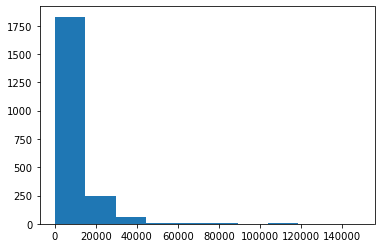

In [306]:
#plot of data shows that the data does not have a normal distribution
plt.hist(twitter_archive_master['favorite_count']);

In [308]:
#find the mean for favorite_counts for all rows 
p_null = twitter_archive_master['favorite_count'].mean()
p_null

7751.506229810799

In [309]:
#get all rows where dog_stage is listed and favorite_count is not null
tweet_with_stage = twitter_archive_master[twitter_archive_master.dog_stage.notnull()]
tweet_with_stage = tweet_with_stage[tweet_with_stage.favorite_count.notnull()]
tweet_with_stage.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,dog_stage,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,,,,
890240255349198849,NaN,NaN,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN,http://twitter.com/download/iphone,doggo,6255.0,28596.0
889665388333682689,NaN,NaN,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,NaN,NaN,NaN,puppo,http://twitter.com/download/iphone,puppo,8571.0,43008.0
889531135344209921,NaN,NaN,2017-07-24 17:02:04,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,NaN,NaN,NaN,puppo,http://twitter.com/download/iphone,puppo,1927.0,13632.0
886366144734445568,NaN,NaN,2017-07-15 23:25:31,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,NaN,NaN,pupper,NaN,http://twitter.com/download/iphone,pupper,2701.0,18964.0
884162670584377345,NaN,NaN,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,NaN,NaN,NaN,http://twitter.com/download/iphone,doggo,2551.0,18343.0


In [310]:
#find the number of tweets with dog stage listed
tweet_with_stage.describe()

,retweet_count,favorite_count
count,362.000000,362.00000
mean,2917.961326,9285.29558
std,6075.231717,15319.38727
min,2.000000,170.00000
25%,675.250000,2308.00000
50%,1327.000000,4210.00000
75%,2949.500000,10522.50000
max,72786.000000,148217.00000


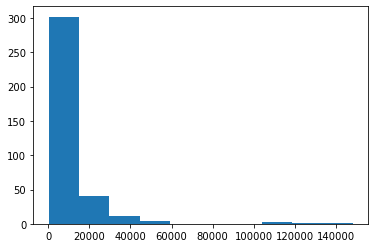

In [315]:
#show the distribution of the data for tweet with dog stage favorite counts
plt.hist(tweet_with_stage.favorite_count);

In [311]:
#get all rows where dog_stage is null but favorite_count is not null
tweet_no_stage = twitter_archive_master[twitter_archive_master.dog_stage.isnull()]
tweet_no_stage = tweet_no_stage[tweet_no_stage.favorite_count.notnull()]
tweet_no_stage.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,dog_stage,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN,7194.0,34556.0
892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN,5401.0,29962.0
891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN,3568.0,22542.0
891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN,7421.0,37803.0
891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN,7953.0,36099.0


In [312]:
#get mean of favorites for rows where dog_stage is Nan
tweet_no_stage.favorite_count.describe()

count      1805.000000
mean       7443.898615
std       10464.921623
min          48.000000
25%        1452.000000
50%        3317.000000
75%        9474.000000
max      114489.000000
Name: favorite_count, dtype: float64

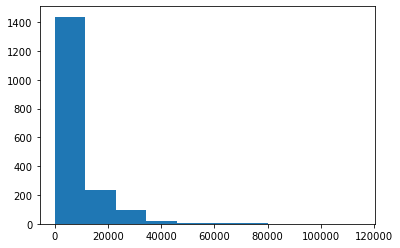

In [313]:
#show distribution of the data for tweet with no dog stage listed
plt.hist(tweet_no_stage.favorite_count);

I will perform a Mann-Whitney U Test on my data because as we saw above my data sets do not follow a normal distribution.  Mann Whitney tests are non-parametric tests so they do not require the data to meet a specific distribution type.  I am using the test to show if there is a significant difference between the means of the favorite counts between tweets that list dog_stage and those that do not.  My pvalue threshold will be .05 or 5%.  Additionally, I have set the alternative parameter to be "greater" for the test.  This will tell me if the first value given (ie. "with_stage_sample['favorite_count']") is statistically 'greater" than my second value (ie. no_stage_sample['favorite_count']) according to the pvalue.

In [316]:
#Mann-Whitney U test
from scipy.stats import mannwhitneyu

stat, pvalue = mannwhitneyu(tweet_with_stage['favorite_count'], tweet_no_stage['favorite_count'], alternative='greater')
print("Stat:", "{:.3f}".format(stat), "pvalue:", "{:.7f}".format(pvalue))

Stat: 371369.500 pvalue: 0.0000197


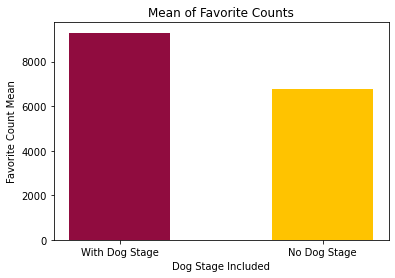

In [317]:
import matplotlib.pyplot as plt
colors = ['#900C3F','#FFC300']
plt.bar(["With Dog Stage", "No Dog Stage"], [with_stage_sample_mean, no_stage_sample_mean], color = colors, width=.5, align='center')
plt.title('Mean of Favorite Counts')
plt.ylabel('Favorite Count Mean')
plt.xlabel('Dog Stage Included');   

My threshold was 5% for my pvalue. The results from the Mann-Whitney U Test show that the pvalue for this test was .017. This is below my threshold. I consider this to be enough evidence to reject my null hypothesis that there is no significant difference between the means of these two datasets. Furthermore, because the test was set to an alternative parameter of "greater" I can say that according to the data tweets with dog stages listed in the text have a significantly greater amount of favorites than those that do not list the dog stage in the text.

### Question 2: Do people who post pictures of dogs with objects or just objects get more retweets than those who post pictures of just dogs?

Every image in the WeRateDogs Twitter archive has been run through a neural network that can classify breeds of dogs. The table "img_predict" holds the image predictions.  We can see that in some of these predictions of breed, something other than "a dog" was identified.  This is most likely because there was an object in the picture with the dog or the picture contains only an object and no dog.  I will use these predictions to answer the above question.  My null hypothesis assumes that there is no significant difference in the number of retweets a tweet will get if an object is in the picture(s) with the dog (or if there is only an object in the picture(s)) and tweet with a picture(s) of a dog only. The alternative hypothesis assumes that there is a greater number of retweets for tweets containing dogs and an object or just objects than tweets with pictures of dogs only.

$H_{0}$ : $P_{dog\_object}$ - $P_{dog\_only}$ <= 0 <br>
$H_{1}$ : $P_{dog\_object}$ - $P_{dog\_only}$ > 0

In [318]:
img_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [319]:
#make a copy of image_predict_clean
img_predict_favs = img_predict_clean.copy()
#merge img_predict_favs and df_rt_fav_clean together 
img_predict_favs = img_predict_favs.set_index('tweet_id').join(df_rt_fav_clean.set_index('tweet_id'), on='tweet_id')
#test merge 
img_predict_favs.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,436.0,2322.0
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,40.0,116.0
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,37.0,103.0
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,118.0,252.0
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,37.0,92.0


In [320]:
#test merge
img_predict_favs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   jpg_url         2075 non-null   object 
 1   img_num         2075 non-null   int64  
 2   p1              2075 non-null   object 
 3   p1_conf         2075 non-null   float64
 4   p1_dog          2075 non-null   bool   
 5   p2              2075 non-null   object 
 6   p2_conf         2075 non-null   float64
 7   p2_dog          2075 non-null   bool   
 8   p3              2075 non-null   object 
 9   p3_conf         2075 non-null   float64
 10  p3_dog          2075 non-null   bool   
 11  retweet_count   2058 non-null   float64
 12  favorite_count  2058 non-null   float64
dtypes: bool(3), float64(5), int64(1), object(4)
memory usage: 184.4+ KB


In [321]:
#query all rows where p1, p2, or p3 have at least one false - this will tell me if an object was dominate in the picture
dog_objects = img_predict_favs.query('p1_dog == False' or 'p2_dog == False' or 'p3_dog == False')
#shape of data
dog_objects.retweet_count.describe()

count      539.000000
mean      2405.690167
std       4049.150012
min         19.000000
25%        468.500000
50%        933.000000
75%       2470.000000
max      33251.000000
Name: retweet_count, dtype: float64

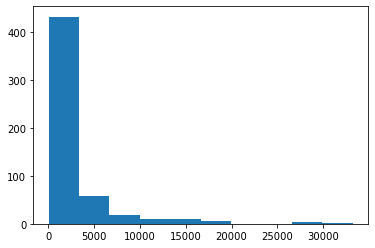

In [322]:
#plot histogram to show distribution
plt.hist(dog_objects.retweet_count);

In [323]:
#query all rows where p1, p2, or p3 are equal to true, only the dog was detected in the picture
dog_only = img_predict_favs.query('p1_dog == True' and 'p2_dog == True' and 'p3_dog == True')
#describe data
dog_only.retweet_count.describe()

count     1486.000000
mean      2430.734859
std       4470.521493
min         11.000000
25%        536.250000
50%       1204.500000
75%       2773.250000
max      72786.000000
Name: retweet_count, dtype: float64

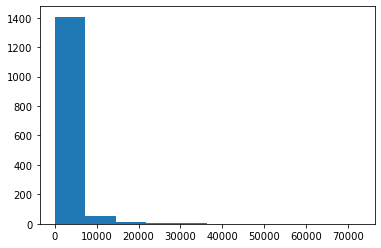

In [324]:
#plot data to show distribution
plt.hist(dog_only.retweet_count);

2427.611273080661


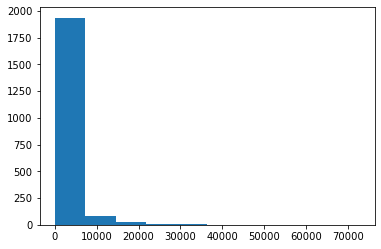

In [325]:
#plot histogram to show distribution of the data
img_retweet_mean = img_predict_favs.retweet_count.mean()
print(img_retweet_mean)
plt.hist(img_predict_favs.retweet_count);

In [326]:
#show variance of dog_objects data
np.var(dog_objects.retweet_count)

16365197.237955263

In [327]:
#show variance of dog_only data
np.var(dog_only.retweet_count)

19972113.186766025

The above plots show that the data in the dog_objects and dog_only dataframes do not follow a normal distribution and do not have equal variances.  Both sets of data do have the same shape (right-skewed).  I will perform a Mann-Whitney U test on this data as this is a nonparametric test so it does not make assumptions about the distribution of the data (ie. the test does not assume normal distribution). Again, I will see my alpha (threshold) to .05 or 5%.

In [328]:
#Mann-Whitney U test
stat, pvalue = mannwhitneyu(dog_objects['retweet_count'], dog_only['retweet_count'], alternative='greater')
print("Stat:", "{:.3f}".format(stat), "pvalue:", pvalue)

Stat: 380164.000 pvalue: 0.9886335775208506


The pvalue from the Mann-Whitney U test is .98 or 98%.  This is well above my threshold of .05 or 5%.  This means that I do not have enough evidence to reject my null hypothesis.

### Question 3: Which day has the highest average retweet count? 



In [329]:
twitter_arc_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [330]:
#add a day_name column to show dady of the week
twitter_archive_master['day_name'] = twitter_archive_master.timestamp.dt.day_name()
twitter_archive_master.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,dog_stage,retweet_count,favorite_count,day_name
tweet_id,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN,7194.0,34556.0,Tuesday
892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN,5401.0,29962.0,Tuesday
891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN,3568.0,22542.0,Monday
891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN,7421.0,37803.0,Sunday
891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,NaN,7953.0,36099.0,Saturday


In [331]:
retweet_mean = twitter_archive_master.retweet_count.mean()
retweet_mean

2298.32441162898

In [332]:
#group dataframe by days of week
day_groups = twitter_archive_master.groupby(['day_name'])
day_groups

In [333]:
#create a dataframe that holds the retweet count means for each day
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
retweet_days = []

for d in days:
    x = day_groups.get_group(d)
    mean = int(x.retweet_count.mean())
    retweet_days.append([d,mean])
retweet_days = pd.DataFrame(retweet_days, columns=['day', 'retweet_count_mean'])
retweet_days

,day,retweet_count_mean
0,Monday,2236
1,Tuesday,2226
2,Wednesday,2627
3,Thursday,2073
4,Friday,2296
5,Saturday,2425
6,Sunday,2198


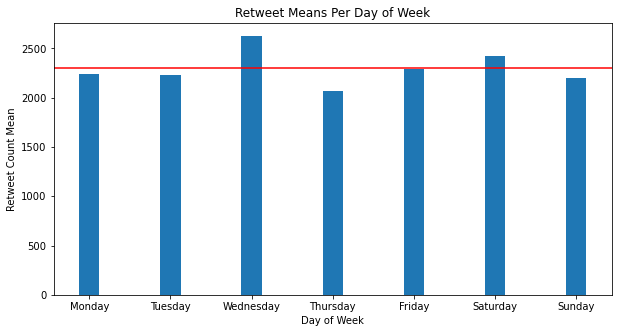

In [334]:
#plot retweet_count_means by day of the week, add a line to show average retweet_count for all days
plt.figure(figsize=(10, 5))
plt.axhline(retweet_mean, color='red')
plt.bar(days, retweet_days.retweet_count_mean, width=.25, align='center')
plt.title('Retweet Means Per Day of Week')
plt.ylabel('Retweet Count Mean')
plt.xlabel('Day of Week');   

The bar chart shows the average retweet counts for each day of the week.  A median line was included in the bar chart to show the mean for all retweet counts for the data set (not split by day of week).  The bar chart shows that Wednesday and Saturday have on average more retweets than the other days of the week.  Future opportunities for analysis may be to combine and average Saturday and Wednesday retweet counts and compare them to the other days of the week retweet count averages.  Statistical tests could be run to see if the differences are significant or not.  This could be used to tell WeRateDogs if there are days that they have better engagement from their audience or not.